In [1]:
import torch
import MiniFL as mfl

In [2]:
STEPS = 2000
SIZE = 100

In [3]:
def measure_all(seed, num_clients, noise_lambda, steps=STEPS):
    def get_task():
        return mfl.tasks.create_worst_case_tridiagonal_quadratics(
            num_clients=num_clients,
            size=SIZE,
            noise_lambda=noise_lambda,
        )

    master, clients = mfl.algorithms.get_marina_master_and_clients(
        get_task(),
        compressors=[mfl.compressors.EdenUnbiasedCompressor(SIZE, bits=1, seed=1 + 7*seed + i) for i in range(num_clients)],
        p=1/num_clients,
        gamma_multiplier=1,
        seed=1 + 13 * seed,
    )
    eden_metrics = mfl.algorithms.run_algorithm_sequantially(master, clients, steps)

    master, clients = mfl.algorithms.get_permk_marina_master_and_clients(
        get_task(),
        p=1/num_clients,
        gamma_multiplier=1,
        seed=7 + 5 * seed,
    )
    permk_metrics = mfl.algorithms.run_algorithm_sequantially(master, clients, int(steps * max(1, num_clients/70)))

    return eden_metrics, permk_metrics

In [4]:
import numpy as np

NOISE_LAMBDAS = list(np.linspace(0, 1, 3))
NUM_CLIENTS = (10, 20, 50, 100)

EDEN_METRICS = {num_clients: {} for num_clients in NUM_CLIENTS}
PERMK_METRICS = {num_clients: {} for num_clients in NUM_CLIENTS}

for i, num_clients in enumerate(NUM_CLIENTS):
    for j, noise_lambda in enumerate(NOISE_LAMBDAS):
        print(f"Measuring {num_clients=} {noise_lambda=}")
        eden_metrics, permk_metrics = measure_all(seed=101*i + j, num_clients=num_clients, noise_lambda=noise_lambda)
        EDEN_METRICS[num_clients][noise_lambda] = eden_metrics
        PERMK_METRICS[num_clients][noise_lambda] = permk_metrics

Measuring num_clients=10 noise_lambda=0.0


TypeError: get_marina_master_and_clients() got multiple values for argument 'compressors'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


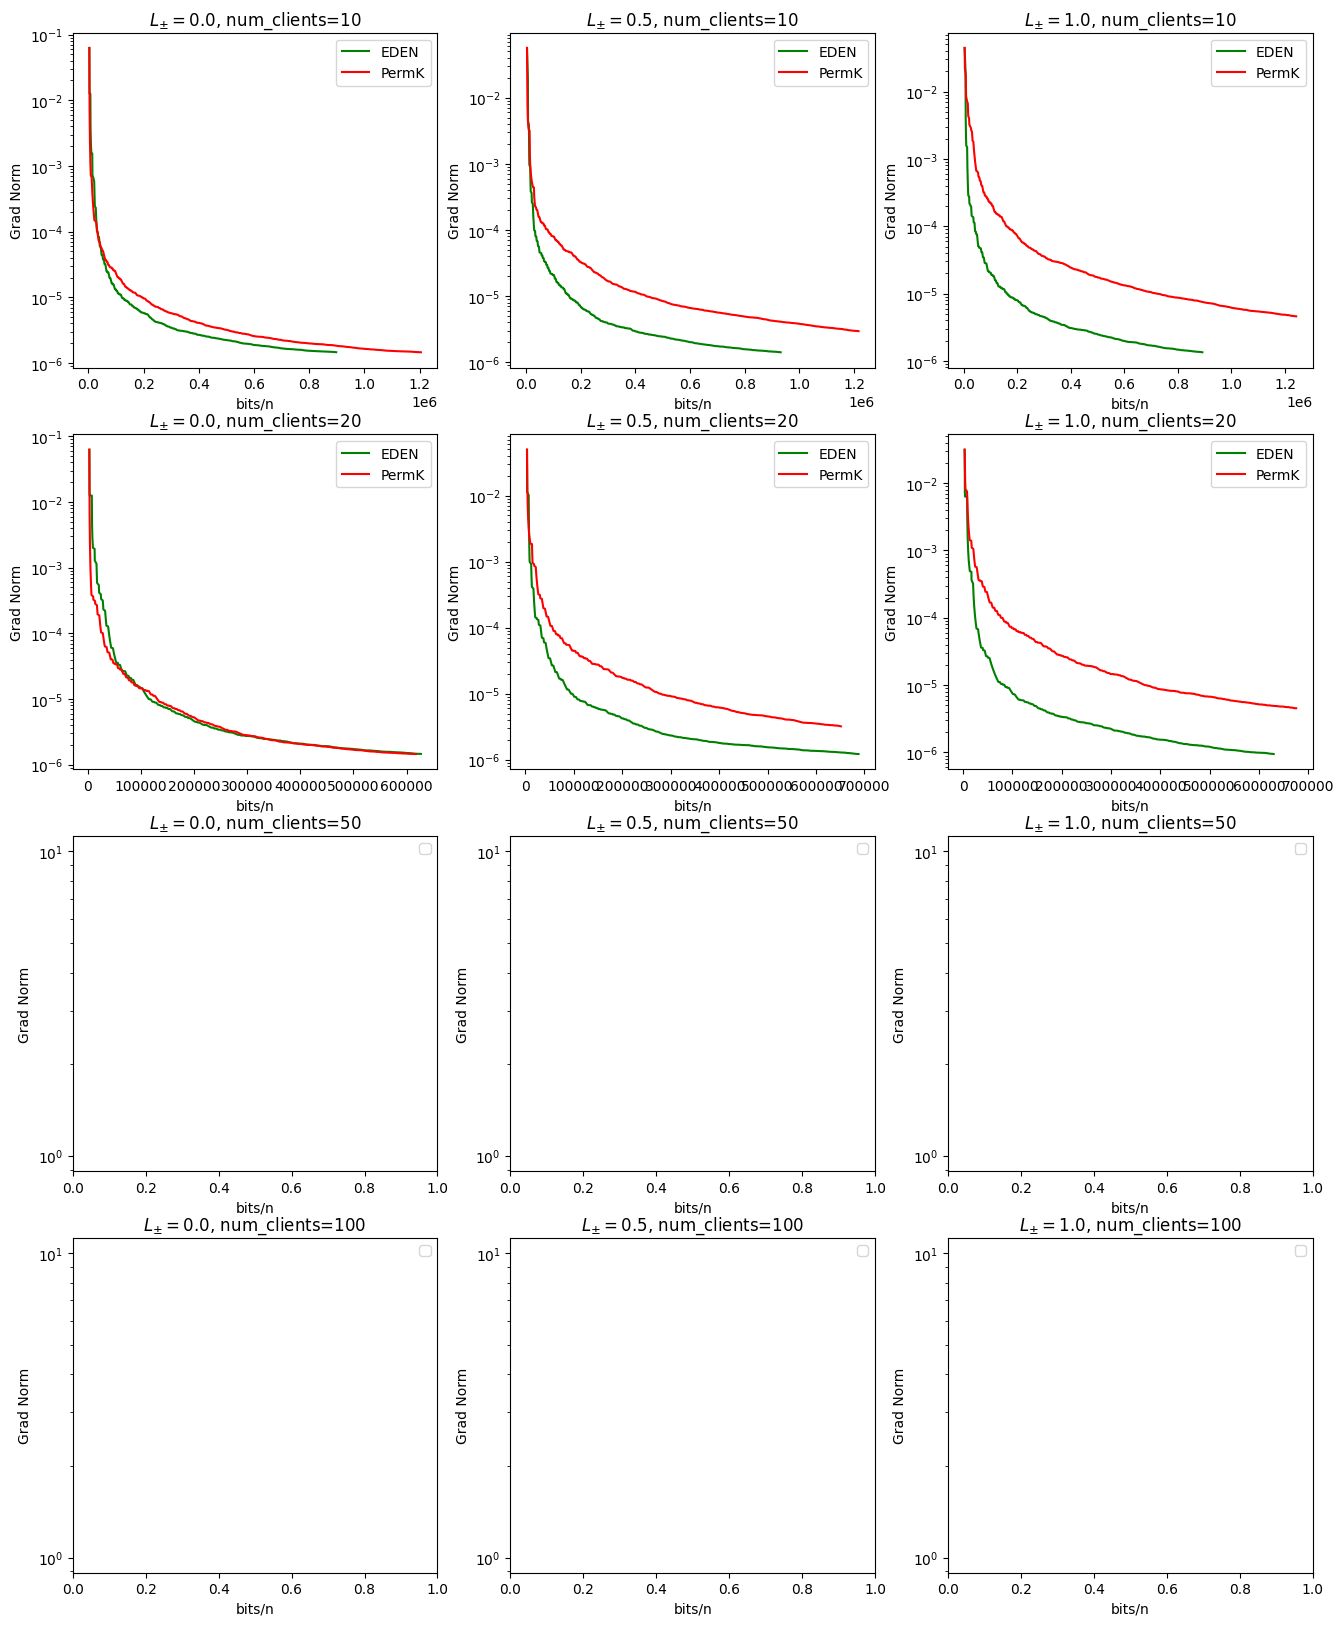

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(16, 20))

for i, num_clients in enumerate(NUM_CLIENTS):
    for j, noise_lambda in enumerate(NOISE_LAMBDAS):
        ax = axes[i][j]
        ax.set_title(r"$L_{\pm}=$" + str(noise_lambda) + ", " + f"{num_clients=}")

        try:
            ax.plot([metrics.total_bits_received/num_clients for metrics in EDEN_METRICS[num_clients][noise_lambda]], [metrics.grad_norm**2 for metrics in EDEN_METRICS[num_clients][noise_lambda]], color="green", label="EDEN")
            ax.plot([metrics.total_bits_received/num_clients for metrics in PERMK_METRICS[num_clients][noise_lambda]], [metrics.grad_norm**2 for metrics in PERMK_METRICS[num_clients][noise_lambda]], color="red", label="PermK")
        except KeyError:
            pass

        ax.set_yscale("log")
        # ax.set_xlim(0, 1.5*1e6)
        # ax.set_ylim(0.005, 3)
        ax.set_xlabel("bits/n")
        ax.set_ylabel("Grad Norm")
        ax.legend()


KeyError: 0.0

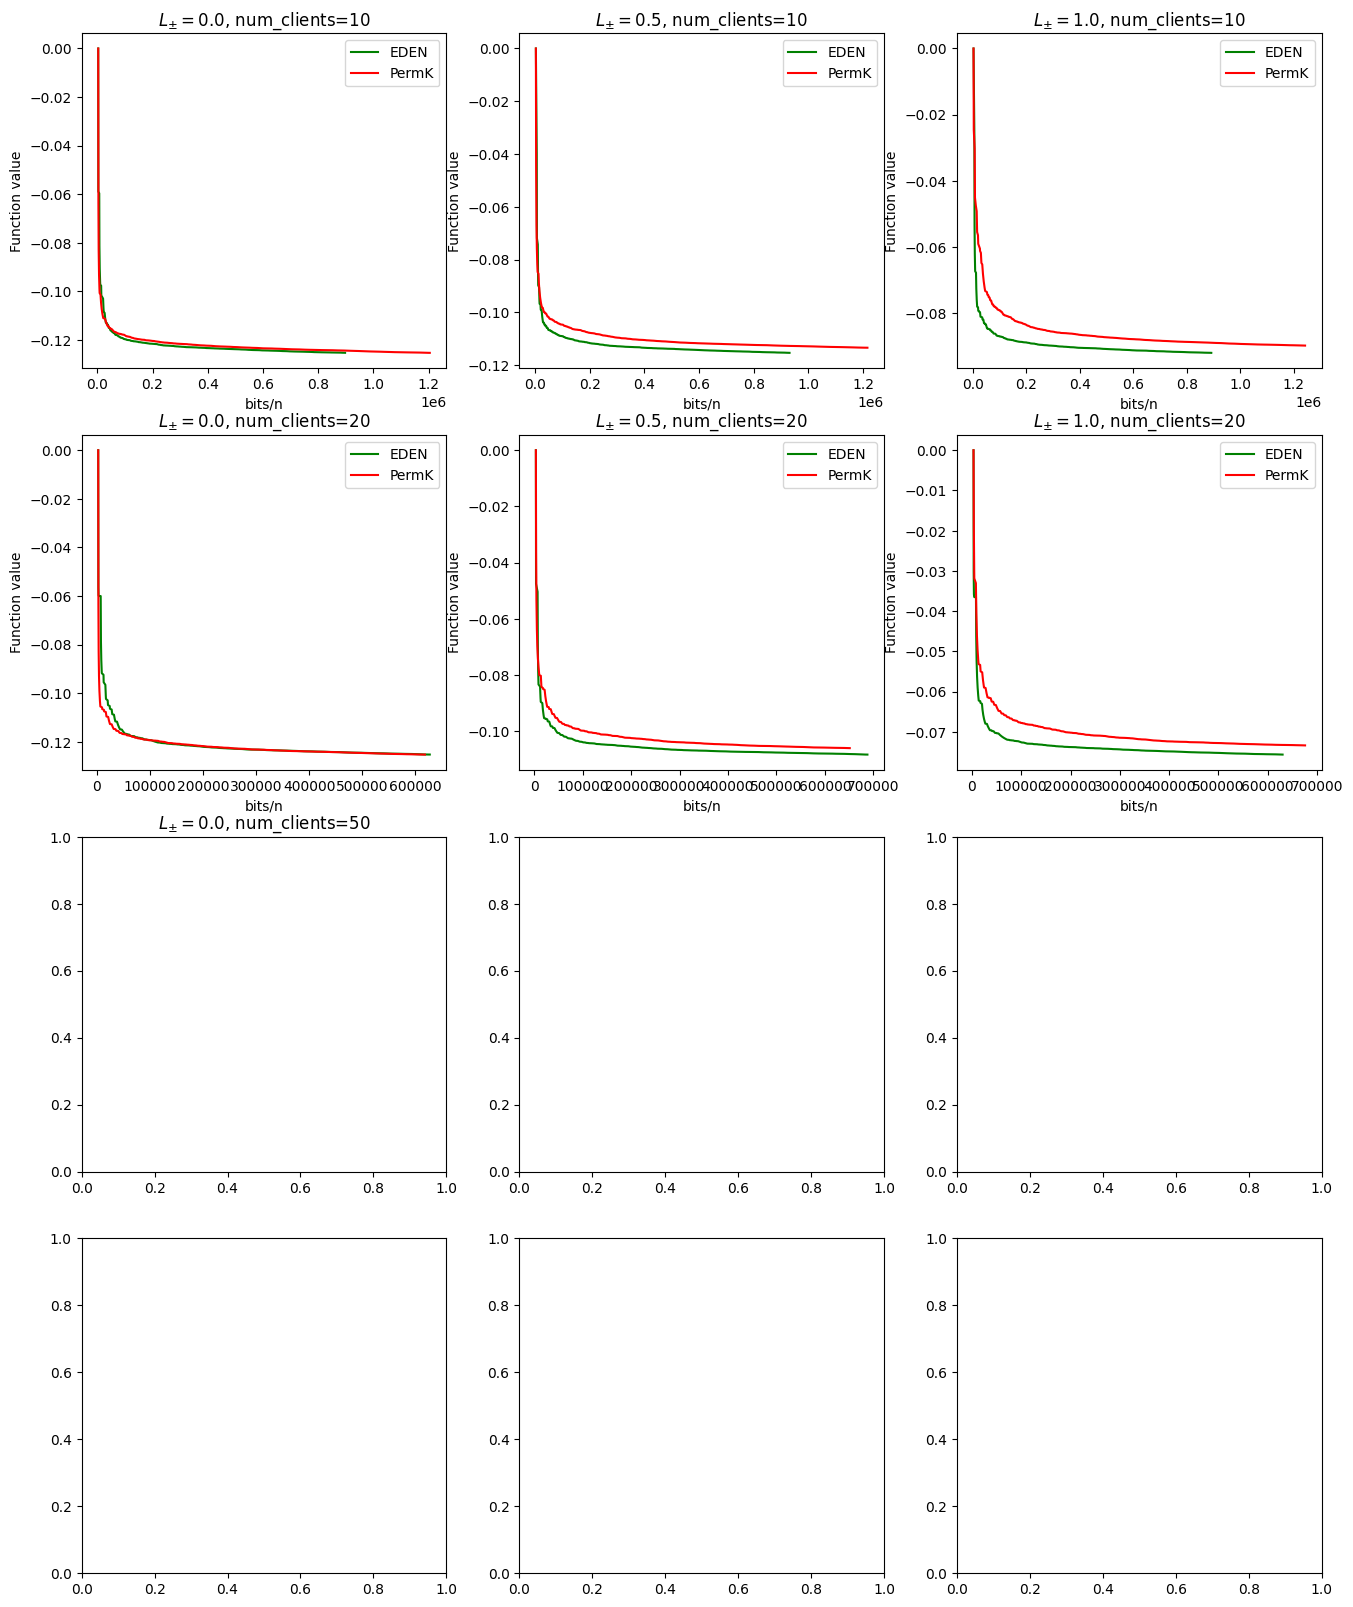

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 3, figsize=(16, 20))

for i, num_clients in enumerate(NUM_CLIENTS):
    for j, noise_lambda in enumerate(NOISE_LAMBDAS):
        ax = axes[i][j]
        ax.set_title(r"$L_{\pm}=$" + str(noise_lambda) + ", " + f"{num_clients=}")

        ax.plot([metrics.total_bits_received/num_clients for metrics in EDEN_METRICS[num_clients][noise_lambda]], [metrics.value for metrics in EDEN_METRICS[num_clients][noise_lambda]], color="green", label="EDEN")
        ax.plot([metrics.total_bits_received/num_clients for metrics in PERMK_METRICS[num_clients][noise_lambda]], [metrics.value for metrics in PERMK_METRICS[num_clients][noise_lambda]], color="red", label="PermK")

        # ax.set_yscale("log")
        # ax.set_xlim(0, 1.5*1e6)
        # ax.set_ylim(0.005, 3)
        ax.set_xlabel("bits/n")
        ax.set_ylabel("Function value")
        ax.legend()
